In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score

In [4]:
kredki = plt.imread('pencils.jpg')

In [8]:
kredki.shape

(427, 640, 3)

In [10]:
kredki_flat = kredki.reshape(-1, 3)

In [11]:
kredki_flat.shape

(273280, 3)

In [38]:
%%time
ks = range(2, 20)
sylwetki = []
inercje = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(kredki_flat)
#     sylwetki.append(silhouette_score(kredki_flat, km.predict(kredki_flat)))
    inercje.append(km.inertia_)

Wall time: 2min 1s


In [46]:
len(km.labels_)

273280

In [44]:
%%time
silhouette_score(kredki_flat, km.predict(kredki_flat))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\mateu\anaconda3\lib\site-packages\IPython\core\magics\execution.py", line 1313, in time
    out = eval(code, glob, local_ns)
  File "<timed eval>", line 1, in <module>
  File "C:\Users\mateu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\mateu\anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "C:\Users\mateu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\mateu\anaconda3\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 234, in silhouette_samples
    results = zip(*pairwise_distances_chunked(X, reduce_func=reduce_func,
  File "C:\Users\mateu\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py", line 1623, in pairwise_distances_chunked

TypeError: object of type 'NoneType' has no len()

In [39]:
inercje_df = pd.DataFrame({'K': ks,
                           'Inercja': inercje})

In [43]:
np.unique(km.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

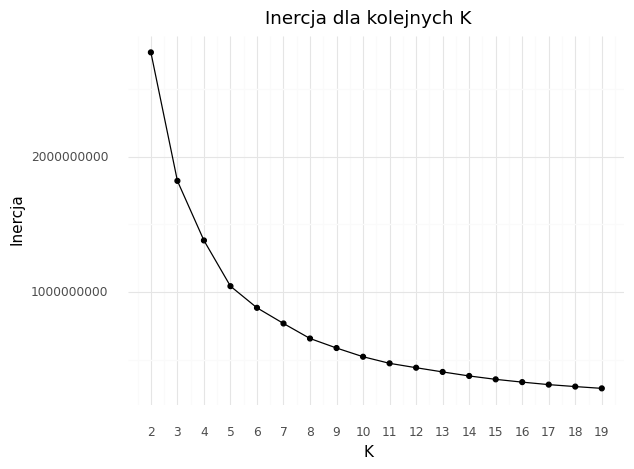

<ggplot: (156808812273)>

In [41]:
(ggplot(inercje_df, aes(x = 'K', y='Inercja'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Inercja dla kolejnych K'))

In [ ]:
df = pd.DataFrame()

In [ ]:
ks = range(2, 20)
inercje = []

for k in ks:
    km = KMeans(n_clusters=k).fit(df[['x1', 'x2']])
    inercje.append(km.inertia_)